In [1]:
import re
from pathlib import Path
from typing import Iterable, Tuple

import numpy as np

corpus_name_re = re.compile(r"corpus_([0-9]+)")


def iter_corpora(folder: Path) -> Iterable[Tuple[int, Path]]:
    for filepath in folder.iterdir():
        re_match = corpus_name_re.match(filepath.name)
        if re_match is not None:
            yield int(re_match[1]), filepath


workspace_path = Path("../workspaces/large_fr/stats/corpora/ngrams/")

ngrams_types = ["bigram_bounded", "bigram_unbounded", "unigram_bounded", "unigram_unbounded"]

In [2]:
corporas = sorted(list(iter_corpora(workspace_path)),
                  key=lambda x: x[0])

In [4]:
from paraphone.tasks.stats import NgramsProbCSV
from itertools import chain

corpora_ngrams = dict()
for corpus_id, corpus_folder in corporas:
    corpora_ngrams[corpus_id] = dict()
    for csv_path in corpus_folder.iterdir():
        ngram_type = csv_path.stem
        corpora_ngrams[corpus_id][ngram_type] = {
            ngram: prob for ngram, prob in NgramsProbCSV(csv_path)}

all_ngrams = {
    ngram_type : set(chain.from_iterable(corpus_ngrams[ngram_type]
                                     for corpus_ngrams
                                     in corpora_ngrams.values()))
    for ngram_type in ngrams_types
}

{'bigram_bounded': {'u d',
  'f u',
  'ø ɡ',
  'k l',
  'ə i',
  'ʒ ɡ',
  'f n',
  'f p',
  'œ̃ ʃ',
  'ø b',
  'l u',
  'z u',
  'l o',
  'ɑ̃ s',
  'z ə',
  'u ɛ',
  'ʁ t',
  'd v',
  'y ɔ̃',
  'b d',
  'ø p',
  'p œ̃',
  'f l',
  'z l',
  'ʁ n',
  'u e',
  'l ɛ',
  'œ̃ m',
  'p l',
  'k œ̃',
  'y z',
  'u w',
  'a w',
  'k j',
  'b w',
  'l ʒ',
  'd ɑ̃',
  'i ə',
  'ɔ̃ f',
  'o o',
  'a o',
  'ɛ u',
  'u y',
  'ø s',
  'ɑ̃ w',
  'z a',
  'o m',
  'b a',
  'e o',
  'œ̃ i',
  's w',
  'o ɡ',
  'ø l',
  'ʁ w',
  'u _',
  'b i',
  'u ʒ',
  'ɛ z',
  'ʃ e',
  'ʁ s',
  'n f',
  'j n',
  'n u',
  '_ ə',
  'e z',
  'ɡ ʁ',
  'd f',
  'd ɔ̃',
  'ɡ ʒ',
  'w l',
  'ʁ d',
  'ʃ ə',
  'v ʁ',
  's z',
  'ʒ ɛ',
  'b u',
  'p k',
  'ø e',
  'ɛ̃ s',
  'ʁ m',
  'ø k',
  'v b',
  'd ɛ',
  'ɡ ə',
  's ə',
  'ʒ ʒ',
  's s',
  'y ʃ',
  'z p',
  'd y',
  'a ɛ̃',
  'j ɛ̃',
  'ɡ o',
  'v œ',
  'a ø',
  's ɛ̃',
  'ə l',
  '_ ɛ̃',
  'p ɡ',
  'ʁ b',
  'œ̃ ʒ',
  'ʃ z',
  '_ p',
  'z b',
  'y w',
  'ʃ ɛ',
  'ə o',
  

In [9]:
from collections import defaultdict
import numpy as np
corpora_ids = [c_id for c_id, _ in corporas]
ngrams_lists = {}
ngrams_stats = {}
for ngram_type in ngrams_types:
    ngram_type_lists = defaultdict(list)
    for ngram in all_ngrams[ngram_type]:
        for corpus_id in corpora_ids:
            try:
                probability: float = corpora_ngrams[corpus_id][ngram_type][ngram]
                ngram_type_lists[ngram].append(probability)
            except KeyError as err:
                ngram_type_lists[ngram].append(0)
    ngrams_lists[ngram_type] = ngram_type_lists

    ngram_type_stats = dict()
    for ngram, probabilities in ngram_type_lists.items():
        ngram_type_stats[ngram] = {
            "std" : np.std(probabilities),
            "mean": np.mean(probabilities),
            "normalized_std": np.std(probabilities) / np.mean(probabilities)
        }
    ngrams_stats[ngram_type] = ngram_type_stats



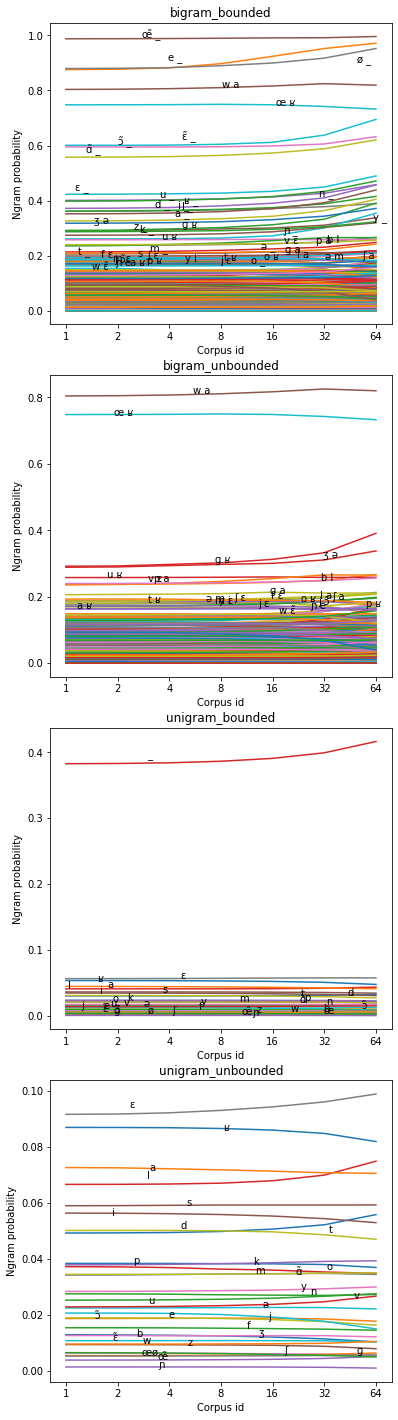

In [34]:
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from random import uniform, seed
from statistics import mean

seed(4577)
fig, axs = plt.subplots(4, 1)
fig.set_figheight(20)
fig.tight_layout(pad=3.0)

x = list(range(len(corpora_ids)))
for ngram_type, ax in zip(ngrams_types, axs):
    ax : Axes
    for ngram in all_ngrams[ngram_type]:
        y = ngrams_lists[ngram_type][ngram]
        lines = ax.plot(x, y)
        if ngram_type in {"bigram_bounded", "bigram_unbounded"} and mean(y) < 0.15:
            continue
        ax.text(x=uniform(x[0], x[-1]), y=mean(y), s=ngram)
    ax.xaxis.set_ticks(x) #set the ticks to be a
    ax.xaxis.set_ticklabels(corpora_ids)
    ax.set_title(ngram_type)
    ax.set_xlabel("Corpus id")
    ax.set_ylabel("Ngram probability")

fig.savefig("ngram_plots.png")